In [1]:
# Biblioteca TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Biblioteca auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

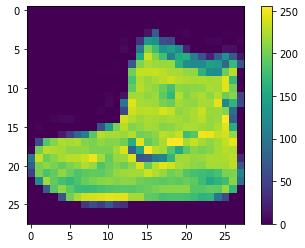

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

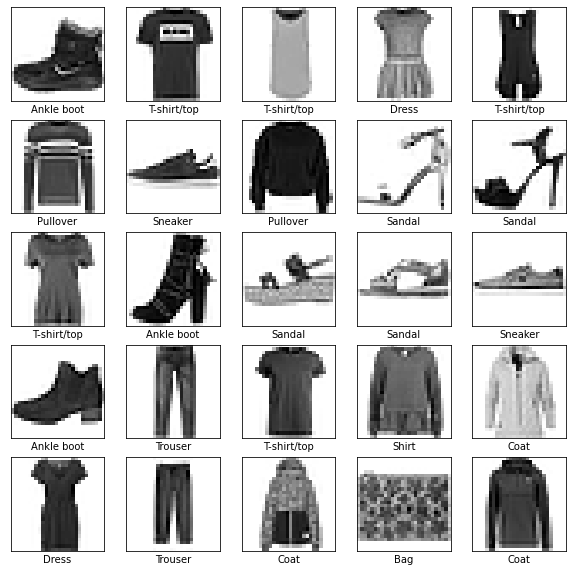

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - ETA: 0s - loss: 2.9135 - accuracy: 0.68 - 12s 198us/sample - loss: 2.9044 - accuracy: 0.6837
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.6910 - accuracy: 0.7469
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5749 - accuracy: 0.7996
Epoch 4/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.5545 - accuracy: 0.8072
Epoch 5/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.5151 - accuracy: 0.8233
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.5080 - accuracy: 0.8261
Epoch 7/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4977 - accuracy: 0.8289
Epoch 8/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4894 - accuracy: 0.8332
Epoch 9/10
60000/60000 [==============================] - 7s 117us/sam

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.5442 - accuracy: 0.8224

Test accuracy: 0.8224


In [9]:
predictions = model.predict(test_images)

In [10]:
predictions[0]

array([2.1295368e-18, 4.0213834e-21, 0.0000000e+00, 3.8056638e-17,
       0.0000000e+00, 3.0897146e-01, 8.0964800e-34, 2.5609943e-01,
       1.6336837e-16, 4.3492913e-01], dtype=float32)

In [11]:
np.argmax(predictions[0])

9

In [12]:
test_labels[0]

9

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

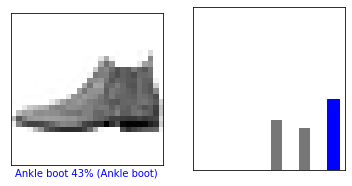

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

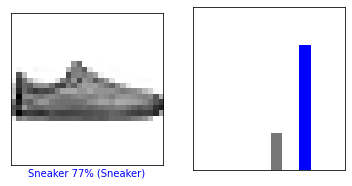

In [15]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

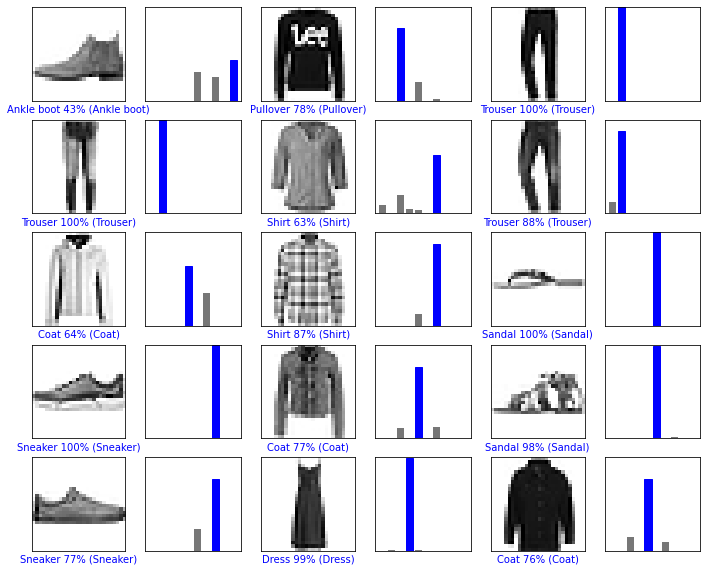

In [16]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [17]:
# Pegue uma imagem do conjunto de dados de teste.
img = test_images[0]
print(img.shape)

(28, 28)


In [18]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [19]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.1295368e-18 4.0213834e-21 0.0000000e+00 3.8056780e-17 0.0000000e+00
  3.0897146e-01 8.0964800e-34 2.5609943e-01 1.6336837e-16 4.3492913e-01]]


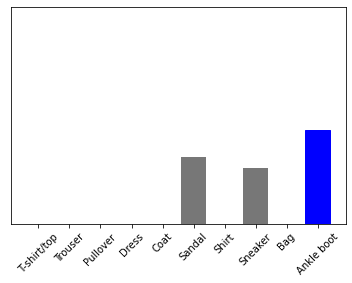

In [22]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [23]:
np.argmax(predictions_single[0])

9